Load data


In [ ]:
# Mount GDrive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context('notebook')

# Install extra lib
# !pip install xgboost
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
df_loan = pd.read_csv('/content/drive/MyDrive/loan_repayment/loan_data.csv')
df_loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [ ]:
df_loan.count()

credit_policy        37066
purpose              37066
int_rate             37066
installment          37066
log_annual_inc       37066
dti                  36966
fico                 37066
days_with_cr_line    37066
revol_bal            37066
revol_util           37054
inq_last_6mths       37066
delinq_2yrs          37032
pub_rec              37066
not_fully_paid       37066
dtype: int64

In [ ]:
df_loan[df_loan.isna().any(axis = 1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
251,1,credit_card,0.143,1201.33,0.0,NaN,679,42156,16858,0.371,1,0.000,2,1
1554,1,credit_card,0.088,826.66,0.0,NaN,709,38353,47472,0.682,1,0.000,0,0
1805,1,debt_consolidation,0.124,167.03,38000.0,5.56,689,39052,0,NaN,0,0.000,0,0
2226,1,home_improvement,0.082,814.70,120000.0,9.25,764,37987,0,NaN,0,0.000,0,0
2345,1,debt_consolidation,0.131,797.80,0.0,NaN,814,37316,97,0.016,0,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35967,1,house,0.082,1256.97,0.0,NaN,709,31686,0,0.000,278568,0.544,0,1
35969,1,home_improvement,0.139,928.66,1.0,NaN,709,33848,0,0.000,1648,0.323,0,1
36356,1,debt_consolidation,0.250,59.64,60000.0,9.40,719,39234,0,0.000,0,NaN,0,1
36503,1,credit_card,0.065,1225.24,0.0,NaN,739,30864,0,0.000,55481,0.937,0,1


In [ ]:
#Drop all Nan rows
df_loan.dropna(inplace=True)

1    26775
0    10145
Name: not_fully_paid, dtype: int64


<Axes: >

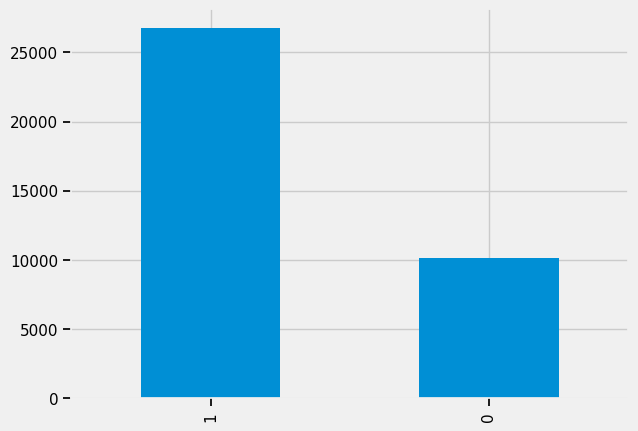

In [ ]:
#Thông kê khoản vay có hoàn trả hay không
# 0:khoản vay không được hoàn trả đầy đủ
# 1:khoản vay được hoàn trả đầy đủ

print(df_loan['not_fully_paid'].value_counts())
df_loan['not_fully_paid'].value_counts().plot(kind='bar')



Pre-processing data

In [ ]:
#Tìm các field là Objec/stirng -> chỉ có cột Purpose -> Xử lý cột này bằng OneHot
objects_cols = [f for f in df_loan.columns if df_loan[f].dtype =='O']
print(objects_cols)

['purpose']


In [ ]:
df_loan['purpose'].value_counts()

debt_consolidation    19516
credit_card            9087
home_improvement       2836
other                  2496
major_purchase          899
medical                 465
house                   406
car                     384
vacation                313
small_business          269
moving                  234
renewable_energy         15
Name: purpose, dtype: int64

In [ ]:
def process_purpose(x):
  if x == 'debt_consolidation':
    return 1
  else:
    return 0

df_loan['purpose_int'] = df_loan['purpose'].apply(process_purpose)


In [ ]:
df_loan["purpose_int"].value_counts()

1    19516
0    17404
Name: purpose_int, dtype: int64

In [ ]:
# Drop purpose và view lại
df_loan.drop(columns=['purpose'], inplace = True)
df_loan.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,1,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0,0
1,1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0,0
2,1,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0,0
3,1,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0,0
4,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1,1


In [ ]:
df_loan['credit_policy'].value_counts()

1    36920
Name: credit_policy, dtype: int64

In [ ]:
#Drop credit_policy và view lại
df_loan.drop(columns=['credit_policy'], inplace=True)
df_loan.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0,0
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0,0
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0,0
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0,0
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1,1


In [ ]:
# Check Corr
corr = df_loan.corr()
corr.style.background_gradient(cmap='coolwarm')

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
int_rate,1.000000,0.042739,-0.055919,0.116065,-0.456244,0.086726,0.021824,0.133468,-0.003504,0.172759,0.046075,-0.036599,0.097478
installment,0.042739,1.000000,0.227242,0.084286,0.022387,-0.125390,0.170643,0.028539,0.226005,0.046695,-0.049956,-0.013016,0.140044
log_annual_inc,-0.055919,0.227242,1.000000,-0.121779,0.020853,-0.119594,0.151355,0.044720,0.177392,0.029868,-0.034424,-0.037026,-0.002927
dti,0.116065,0.084286,-0.121779,1.000000,-0.013244,-0.044598,0.077765,0.000342,0.081434,0.032497,-0.010775,-0.031361,0.054696
fico,-0.456244,0.022387,0.020853,-0.013244,1.000000,-0.120728,-0.021722,-0.188516,-0.065700,-0.307689,-0.191167,-0.027124,-0.024893
days_with_cr_line,0.086726,-0.125390,-0.119594,-0.044598,-0.120728,1.000000,-0.066180,-0.068710,-0.187349,-0.052515,-0.006409,-0.038029,-0.006357
revol_bal,0.021824,0.170643,0.151355,0.077765,-0.021722,-0.066180,1.000000,0.128898,-0.203446,-0.146972,-0.067585,-0.356469,0.029699
revol_util,0.133468,0.028539,0.044720,0.000342,-0.188516,-0.068710,0.128898,1.000000,-0.061745,-0.014098,-0.052424,-0.086816,0.004182
inq_last_6mths,-0.003504,0.226005,0.177392,0.081434,-0.065700,-0.187349,-0.203446,-0.061745,1.000000,0.220876,-0.056046,0.219629,-0.007000
delinq_2yrs,0.172759,0.046695,0.029868,0.032497,-0.307689,-0.052515,-0.146972,-0.014098,0.220876,1.000000,-0.030163,0.135084,0.007397


In [ ]:
# Scale dữ liệu

input_fields = df_loan.drop(columns=["not_fully_paid"]).columns.values

X = df_loan[input_fields]
y = df_loan['not_fully_paid']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[input_fields])
X[input_fields] =scaler.transform(X[input_fields])

<ipython-input-16-b47e99423b6d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[input_fields] =scaler.transform(X[input_fields])


In [ ]:
X.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
0,0.352941,0.285030,0.016129,0.015716,0.161290,0.760027,0.039118,0.029304,0.000005,0.333333,0.0,0.0
1,0.223529,0.511634,0.005914,0.030160,0.376344,0.666667,0.023568,0.020696,0.000003,0.066667,0.0,0.0
2,0.137255,0.459866,0.017742,0.016126,0.161290,0.687403,0.040966,0.024652,0.000000,0.000000,0.0,0.0
3,0.458824,0.155066,0.004301,0.032102,0.430108,0.877044,0.016865,0.009826,0.000003,0.000000,0.0,0.0
4,0.137255,0.329176,0.003871,0.023754,0.268817,0.794100,0.014965,0.011130,0.000002,0.000000,0.0,1.0


In [ ]:
# Split dữ liệu train, testt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Train model 01 - Dùng Logistic regression, Upsampling bằng SMOTE


In [ ]:
y_train.value_counts()

1    21484
0     8052
Name: not_fully_paid, dtype: int64

In [ ]:
#Unsampling
sm = SMOTE(k_neighbors = 5)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [ ]:
y_train_resample.value_counts()

1    21484
0    21484
Name: not_fully_paid, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2093
           1       0.87      0.88      0.88      5291

    accuracy                           0.82      7384
   macro avg       0.78      0.78      0.78      7384
weighted avg       0.82      0.82      0.82      7384



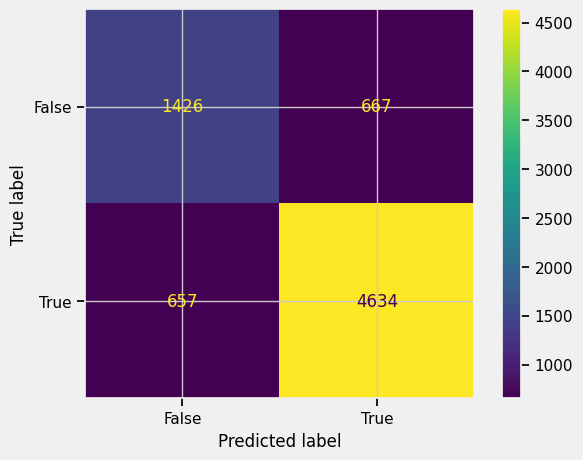

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

# In du lieu
print(classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels =[False, True])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

#Grid search tim tham so
params_grid_logistic = {'C':[0.01, 0.1, 10, 100, 1000], 'penalty':['l1','l2']} # l1 lasso l2 ridge

grid_logistic = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter = 1000), params_grid_logistic, cv =10)
grid_logistic.fit(X_train_resample, y_train_resample)

print('turned hyperparameters : (best parameters)', grid_logistic.best_params_)
print('\033[1m' + 'accuracy:', grid_logistic.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

turned hyperparameters : (best parameters) {'C': 1000, 'penalty': 'l2'}
accuracy: 0.7911471950678854


              precision    recall  f1-score   support

           0       0.73      0.66      0.70      2093
           1       0.87      0.90      0.89      5291

    accuracy                           0.84      7384
   macro avg       0.80      0.78      0.79      7384
weighted avg       0.83      0.84      0.83      7384



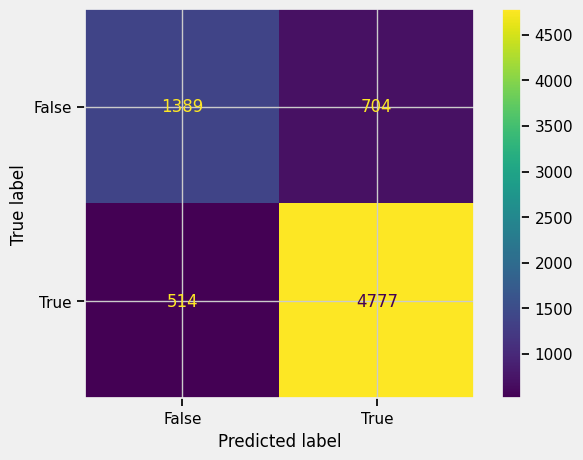

In [ ]:
y_pred = grid_logistic.predict(X_test)
#In ra du lieu
print(classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels =[False, True])
cm_display.plot()
plt.show()

# Train 02. Không Upsampling và dùng XGBoost

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

#In bao cao ket qua
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model_xgb, X_test, y_test)



              precision    recall  f1-score   support

           0       0.74      0.65      0.69      2093
           1       0.87      0.91      0.89      5291

    accuracy                           0.84      7384
   macro avg       0.80      0.78      0.79      7384
weighted avg       0.83      0.84      0.83      7384



NameError: ignored

0.77964


<ipython-input-29-f5f4e3f3854d>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'r--', color='navy')


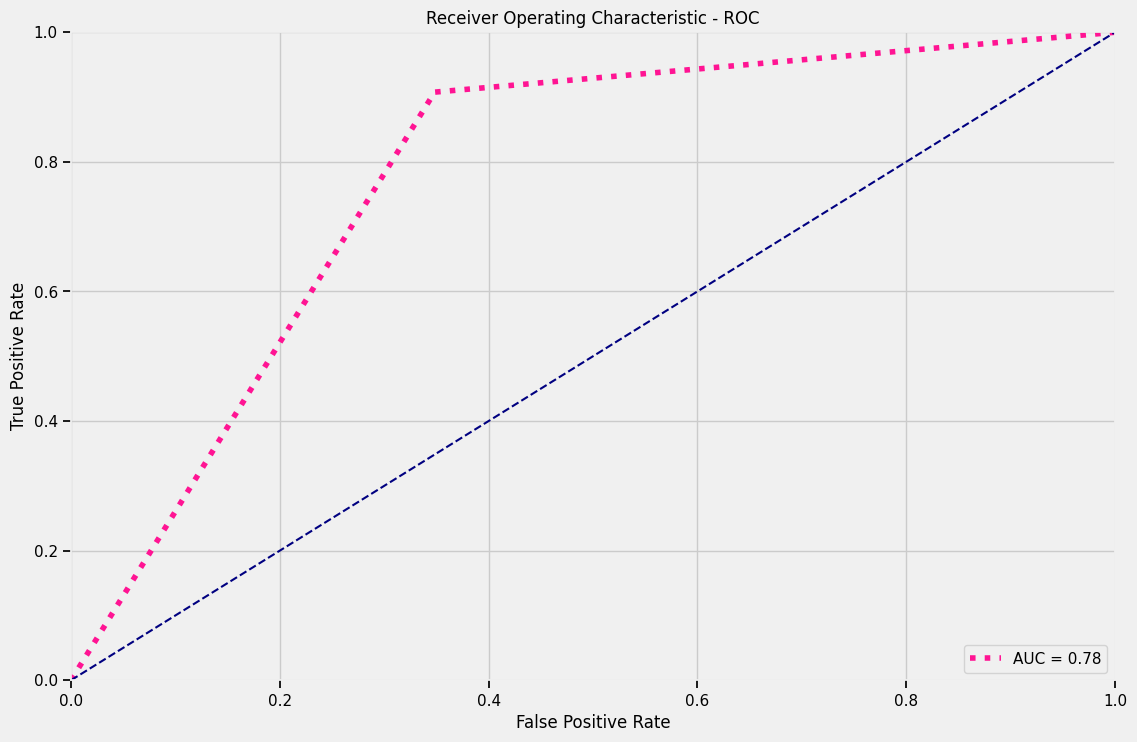

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, threshold_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float('{:.5f}'.format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize =(12,8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros,':', linewidth = 4, label = 'AUC = %0.2f' % auc_log_ros, color ='deeppink',)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--', color='navy')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()